In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/groceries - groceries.csv',sep=',')
df = df.iloc[:,1:]
df = df.replace(to_replace = np.nan, value = 'nan') 
df.shape

(9835, 32)

In [ ]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import matplotlib.pyplot as plt

In [ ]:
transactions = []

for i in range(0, 9835):
  temp=[]
  for u in df.columns:
    if df[u][i]!='nan':
      temp.append(df[u][i])
  transactions.append(temp)

9835

In [ ]:
TE = TransactionEncoder()
dataset = TE.fit(transactions).transform(transactions)
new_df = pd.DataFrame(dataset,columns = TE.columns_)

In [ ]:
itemset = apriori(new_df,min_support=0.05,use_colnames=True)
itemset

,support,itemsets
0,0.052466,(beef)
1,0.080529,(bottled beer)
2,0.110524,(bottled water)
3,0.064870,(brown bread)
4,0.055414,(butter)
5,0.077682,(canned beer)
6,0.082766,(citrus fruit)
7,0.058058,(coffee)
8,0.053279,(curd)
9,0.063447,(domestic eggs)


<BarContainer object of 31 artists>

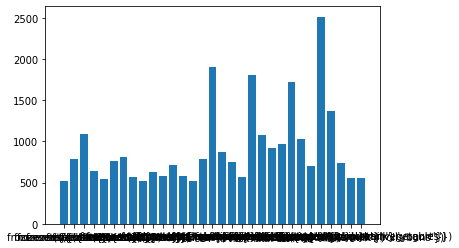

In [ ]:
sp = [float(itemset['support'][i])*9835 for i in range(0,itemset.shape[0])]
items = [str(itemset['itemsets'][i]) for i in range(0,itemset.shape[0])]
plt.bar(items,sp)
plt.xticklab

[Text(0, 0, "frozenset({'beef'})"),
 Text(0, 0, "frozenset({'bottled beer'})"),
 Text(0, 0, "frozenset({'bottled water'})"),
 Text(0, 0, "frozenset({'brown bread'})"),
 Text(0, 0, "frozenset({'butter'})"),
 Text(0, 0, "frozenset({'canned beer'})"),
 Text(0, 0, "frozenset({'citrus fruit'})"),
 Text(0, 0, "frozenset({'coffee'})"),
 Text(0, 0, "frozenset({'curd'})"),
 Text(0, 0, "frozenset({'domestic eggs'})"),
 Text(0, 0, "frozenset({'frankfurter'})"),
 Text(0, 0, "frozenset({'fruit/vegetable juice'})"),
 Text(0, 0, "frozenset({'margarine'})"),
 Text(0, 0, "frozenset({'napkins'})"),
 Text(0, 0, "frozenset({'newspapers'})"),
 Text(0, 0, "frozenset({'other vegetables'})"),
 Text(0, 0, "frozenset({'pastry'})"),
 Text(0, 0, "frozenset({'pip fruit'})"),
 Text(0, 0, "frozenset({'pork'})"),
 Text(0, 0, "frozenset({'rolls/buns'})"),
 Text(0, 0, "frozenset({'root vegetables'})"),
 Text(0, 0, "frozenset({'sausage'})"),
 Text(0, 0, "frozenset({'shopping bags'})"),
 Text(0, 0, "frozenset({'soda'})")

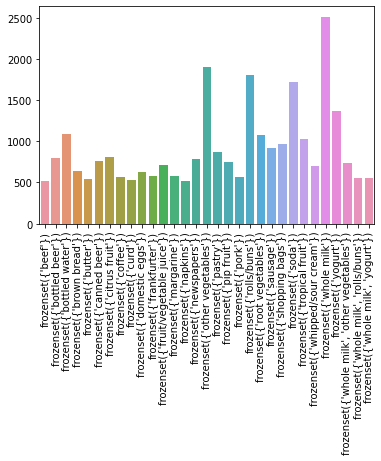

In [ ]:
import seaborn as sns
bar = sns.barplot(x=items,y=sp)
bar.set_xticklabels(bar.get_xticklabels(),rotation=90)

In [ ]:
float(itemset['support'][2]

0.11052364006100661

In [ ]:
association_rules(itemset,metric='confidence',min_threshold=0.3) 

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(other vegetables),(whole milk),0.193493,0.255516,0.074835,0.386758,1.513634,0.025394,1.214013
1,(rolls/buns),(whole milk),0.183935,0.255516,0.056634,0.307905,1.205032,0.009636,1.075696
2,(yogurt),(whole milk),0.139502,0.255516,0.056024,0.401603,1.571735,0.020379,1.244132
